In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np 
import openpyxl as xl
from openpyxl import load_workbook
from sklearn.preprocessing import StandardScaler




k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
sns.set()
try:
    wb=xl.load_workbook('testing.xlsx')
    sheet = wb.get_sheet_by_name('ML result')
except FileNotFoundError:
    wb = xl.Workbook()
    sheet = wb.active
    sheet.title='ML result'
    


train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')


train_test_data  = [train,test]

for dataset in  train_test_data:
    dataset['Title']=dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)


<ipython-input-3-db60d9bc3484>:23: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  sheet = wb.get_sheet_by_name('ML result')


# TITLE

In [4]:
# for dataset  in train_test_data:
#     dataset['Title'] = dataset['Title'].replace(['Lady','Capt','Col','Countess','Don','Dona','Dr','Jonkheer','Major','Sir'],'Rare')
#     dataset['Title'] = dataset['Title'].replace(['Mlle','Ms'],'Miss')
#     dataset['Title'] = dataset['Title'].replace('Mme','Mrs')

# title_mapping = {'Mr':0,'Master':0.4,'Rev':0.8,'Miss':1.2,'Mrs':1.6,'Rare':2}

for dataset  in train_test_data:
    dataset['Title'] = dataset['Title'].replace(['Rev','Lady','Capt','Master','Col','Countess','Don','Dona','Dr','Jonkheer','Major','Sir'],'Rare')
    dataset['Title'] = dataset['Title'].replace(['Mlle','Ms'],'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')

title_mapping = {'Mr':0,'Miss':1,'Mrs':2,'Rare':3}

for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)


In [5]:
pd.crosstab(train['Title'],train['Survived'])

Survived,0,1
Title,,
0,436,81
1,55,130
2,26,100
3,32,31


# SEX

In [6]:
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)
for dataset  in train_test_data:
    dataset['Sex'] = dataset['Sex'].replace('male',0)
    dataset['Sex'] = dataset['Sex'].replace('female',1)

# AGE

In [7]:
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'),inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'),inplace=True)

for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 18, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 35), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 35) & (dataset['Age'] <= 45), 'Age'] = 2
    dataset.loc[ dataset['Age'] > 45, 'Age'] = 3


# EMBARKED

In [8]:
for dataset in train_test_data:
    dataset["Embarked"]=dataset['Embarked'].fillna('S')

embarked_mapping = {'S':0,'C':1,'Q':2}
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].map(embarked_mapping)

# FARE

In [9]:
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'),inplace=True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'),inplace=True)



for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 15, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 15) & (dataset['Fare'] <= 35), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 35) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

#     # dataset.loc[ dataset['Fare'] <= 10, 'Fare'] = 0
#     # dataset.loc[(dataset['Fare'] > 10) & (dataset['Fare'] <= 20), 'Fare'] = 1
#     # dataset.loc[(dataset['Fare'] > 20) & (dataset['Fare'] <= 30), 'Fare'] = 2
#     # dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 50), 'Fare'] = 3
#     # dataset.loc[(dataset['Fare'] > 50) & (dataset['Fare'] <= 100), 'Fare'] = 4
#     # dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 5

    dataset['Fare'] = dataset['Fare'].round(0)


# CABIN

In [10]:
for dataset in train_test_data:
    dataset['Cabin'] =dataset['Cabin'].str[:1]
    
# cabin_mapping = {'A':0,'B':0.4,'C':0.8,'D':1.2,'E':1.6,'F':2,'G':2.4,'T':2.8}
cabin_mapping = {'A':0,'B':0.4,'C':0.8,'D':1.2,'E':1.2,'F':1.6,'G':2,'T':2}

for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].map(cabin_mapping)

train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'),inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'),inplace=True)


In [11]:
pd.crosstab(train['Cabin'],train['Survived'])

Survived,0,1
Cabin,,
0.0,8,7
0.4,12,35
0.8,45,54
1.2,16,49
1.4,94,74
1.6,371,121
2.0,3,2


# FAM-SIZE

In [12]:

train['FamilySize'] = train['SibSp']+train['Parch'] + 1
test['FamilySize'] = test['SibSp']+test['Parch'] + 1
# family_mapping={1:0, 2:0.2, 3:0.4, 4:0.6, 5:0.8, 6:1, 7:1.2, 8:1.4,8:1.6, 9:1.8, 11:2}
family_mapping={1:0, 2:0.2, 3:0.4, 4:0.6, 5:0.6, 6:0.8, 7:0.8, 8:0.8,11:0.8}
for dataset in train_test_data:
    dataset['FamilySize']=dataset['FamilySize'].map(family_mapping)


In [13]:
pd.crosstab(train['FamilySize'],train['Survived'])
# train['FamilySize'].value_counts().sort_index()

Survived,0,1
FamilySize,,
0.0,374,163
0.2,72,89
0.4,43,59
0.6,20,24
0.8,40,7


## ====================================================

In [14]:

feature_drop = ['Ticket','SibSp','Parch']
train=train.drop(feature_drop,axis=1)
test=test.drop(feature_drop,axis=1)
train=train.drop(['PassengerId'],axis=1)

train_data = train.drop('Survived',axis=1)
target = train['Survived']


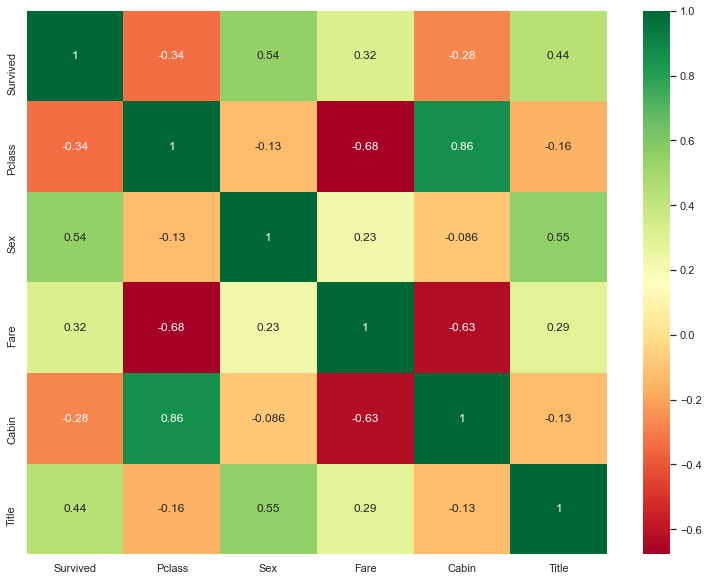

In [23]:
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat['Survived'])>=0.15]

plt.figure(figsize=(13,10))
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap='RdYlGn')
plt.show()

In [15]:
clf = KNeighborsClassifier(n_neighbors=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data,target,cv = k_fold,n_jobs=1,scoring=scoring)
kNN_Result = round(np.mean(score)*100,2)
print(score)
print('============================')
print('kNN Result : ' + str(kNN_Result))
print('============================')

[0.81111111 0.78651685 0.79775281 0.80898876 0.85393258 0.82022472
 0.83146067 0.7752809  0.82022472 0.82022472]
kNN Result : 81.26


In [16]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
DecisionTree_Result = round(np.mean(score)*100,2)
print(score)
print('============================')
print('DecisionTree Result : ' + str(DecisionTree_Result))
print('============================')

[0.77777778 0.85393258 0.76404494 0.75280899 0.83146067 0.85393258
 0.82022472 0.80898876 0.74157303 0.78651685]
DecisionTree Result : 79.91


In [17]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
RandomForest_Result = round(np.mean(score)*100,2)
print(score)
print('============================')
print('RandomForest Result : ' + str(RandomForest_Result))
print('============================')

[0.78888889 0.87640449 0.76404494 0.7752809  0.83146067 0.84269663
 0.82022472 0.76404494 0.7752809  0.78651685]
RandomForest Result : 80.25


C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


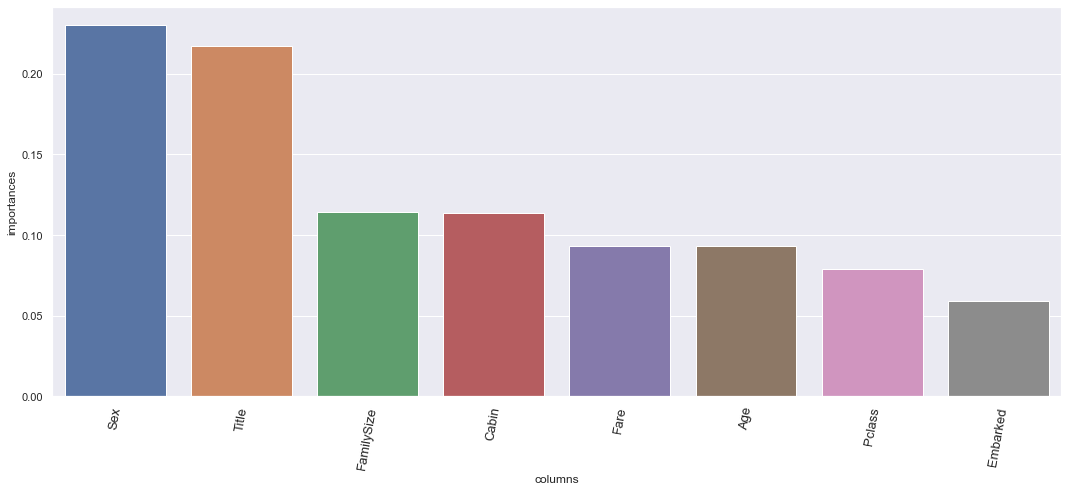

In [19]:
X=train_data
y=target

clf.fit(X,y)
feature_importance = clf.feature_importances_

df_fi = pd.DataFrame({'columns':X.columns, 'importances':feature_importance})
df_fi = df_fi[df_fi['importances'] > 0] # importance가 0이상인 것만 
df_fi = df_fi.sort_values(by=['importances'], ascending=False)

fig = plt.figure(figsize=(15,7))
ax = sns.barplot(df_fi['columns'], df_fi['importances'])
ax.set_xticklabels(df_fi['columns'], rotation=80, fontsize=13)
plt.tight_layout()
plt.show()

In [17]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
GaussianNB_Result = round(np.mean(score)*100,2)
print(score)
print('============================')
print('GaussianNB Result : ' + str(GaussianNB_Result))
print('============================')

[0.78888889 0.71910112 0.73033708 0.71910112 0.68539326 0.80898876
 0.70786517 0.74157303 0.80898876 0.83146067]
GaussianNB Result : 75.42


In [18]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
SVC_Result = round(np.mean(score)*100,2)
print(score)
print('============================')
print('SVC Result : ' + str(SVC_Result))
print('============================')

[0.82222222 0.78651685 0.79775281 0.80898876 0.84269663 0.83146067
 0.82022472 0.80898876 0.80898876 0.84269663]
SVC Result : 81.71


## Save Result Data in Result_save_file 

In [19]:
# index=1
# idx = 2
# if sheet['A{}'.format(idx)].value != None:
#     idx+=1 
# else:
#     index = idx

# while True:
#     if sheet['A{}'.format(index)].value == None:
#         break
#     index+=1
# datas = (index-1,kNN_Result,DecisionTree_Result,RandomForest_Result,GaussianNB_Result,SVC_Result)
# col_names = ['Index','kNN','DecisionTree','RandomForest','GaussianNB','SVM']

# for seq, name in enumerate(col_names):
#     sheet.cell(row=1, column=seq+1, value=name)
# for seq, name in enumerate(datas):
#     sheet.cell(row=index,column=seq+1,value=name)

# print(sheet['A{}'.format(index)].value)

# wb.save('testing.xlsx')

# **Make result File**

In [20]:
# clf = SVC()
# clf.fit(train_data,target)

# test_data = test.drop('PassengerId',axis=1).copy()
# prediction = clf.predict(test_data)
# submission = pd.DataFrame({
#     'PassengerId':test['PassengerId'],
#     'Survived':prediction
# })

# submission.to_csv('submission_1.csv',index=False)

# submission = pd.read_csv('submission_1.csv')
# submission.head(10)

TypeError: unsupported operand type(s) for ^: 'float' and 'int'